# WeRateDogs推特数据分析
## 收集

In [1]:
# 导入需要的库
%matplotlib inline
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json

# 配置matplotlib生成图表中的中文显示
plt.rcParams['font.family'] = 'SimHei'

In [2]:
# 读取twitter-archive-enhanced.csv
twt_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 获取image-predictions.tsv
r = requests.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6'\
                 '%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv', stream=True)
with open('image-predictions.tsv','w') as f:
    f.write(r.text)
    
#读取image-predictions.tsv
img_pre = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# 读取tweet_json.txt
ls_twt_json = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        ls_twt_json.append(json.loads(line.rstrip('\r')))
twt_json = pd.DataFrame(ls_twt_json)

## 评估
### 目测评估

In [5]:
twt_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
img_pre

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
pd.options.display.max_columns = 100
twt_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,892420643555336193,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,892177421306343426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,891815181378084864,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,891689557279858688,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,891327558926688256,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,None,891087950875897856,891087950875897856,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,None,890971913173991426,890971913173991426,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,None,890729181411237888,890729181411237888,None,NaN,None,NaN,None,False,en,None,False,False,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id'

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

##### `twitter_archive`

In [8]:
# 查看twt_archive的字段和字段属性
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# 查看是否有重复行
sum(twt_archive.duplicated())

0

In [10]:
# 查看name的取值，找出异常取值
twt_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
an            7
Bailey        7
Toby          7
Daisy         7
Leo           6
Stanley       6
Jax           6
Milo          6
Koda          6
Jack          6
Scout         6
Rusty         6
Oscar         6
Bella         6
Dave          6
Chester       5
           ... 
Hanz          1
Molly         1
River         1
Dietrich      1
Sprout        1
Godzilla      1
Angel         1
Emma          1
Grizzie       1
Farfle        1
Ralf          1
Julio         1
Flash         1
Geno          1
Ridley        1
Reagan        1
Harrison      1
Beemo         1
Kollin        1
Stu           1
Striker       1
Luther        1
Bowie         1
Socks         1
Pavlov        1
Boots         1
Ruffles       1
Laika         1
Shikha        1
Loomis        1
Name: name, Length: 957,

In [11]:
# 发现有部分name的异常值，一般都为全部小写
names = twt_archive.name.value_counts().index.tolist()
for name in names:
    if name.islower():
        print(name, end=', ')

a, the, an, very, just, one, quite, mad, not, actually, getting, space, infuriating, by, old, all, his, this, unacceptable, life, light, officially, incredibly, my, such, 

In [12]:
# 查看source的取值
twt_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
#查看rating_denominator的取值
twt_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# 查看rating_denominator不为10的text和rating_numerator信息，确认是否有误
twt_archive[twt_archive.rating_denominator!=10].loc[:,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [15]:
# 查看stage是否有多余一种"地位"的推特
stage_none = (twt_archive.doggo=='None')*1+(twt_archive.floofer=='None')*1+(twt_archive.pupper=='None')*1+(twt_archive.puppo=='None')*1
pd.set_option('display.max_colwidth',300)
twt_archive.loc[stage_none[stage_none<3].index.tolist(),['text','doggo', 'floofer', 'pupper', 'puppo']]

,text,doggo,floofer,pupper,puppo
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
778,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None
822,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


##### `image-predictions`

In [16]:
# 查看Img_pre的字段和字段类型
img_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### `twitter_json`

In [17]:
# 查看twitter_json的字段和字段类型
twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [18]:
# 查看source的取值
twt_json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2217
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
# 查看retweet_count取值是否合理
twt_json.retweet_count.describe()

count     2352.000000
mean      3134.932398
std       5237.846296
min          0.000000
25%        618.000000
50%       1456.500000
75%       3628.750000
max      79116.000000
Name: retweet_count, dtype: float64

In [20]:
# 查看favorite_count取值是否合理
twt_json.favorite_count.describe()

count      2352.000000
mean       8109.198980
std       11980.795669
min           0.000000
25%        1417.000000
50%        3596.500000
75%       10118.000000
max      132318.000000
Name: favorite_count, dtype: float64

#### 质量
##### `twitter_archive`
- tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id应为字符格式  
- name中有a, the, an, very, just, one, quite, mad, not, getting, actually, this, life, by, all, space, officially, incredibly, light, infuriating, my, unacceptable, such, his, old，为无效名字  
- timestamp, retweeted_status_timestamp应该是时间格式  
- source列lmxl可以去掉标签，只保留来源类型信息，并把数据改为分类数据  
- 部分rating_numerator和rating_denominator与推特内容不符，重新提取
- 有一条数据的rating_denominator为0，评分不合理  
- rating_denominator不统一，不利于比较分析  
- 部分推特是转发的，不是原始推特，不进行分析  

##### `image-predictions`
- tweet_id应为字符串  
- img_num, p1, p2, p3应为分类数据  
- 部分推特是没有图片，不进行分析  

##### `twitter_json`
- source列可以去掉标签，只保留内容，并把数据改为分类数据，只需要保留来源类型信息

#### 整洁度
##### `twitter_archive`
- doggo, floofer, pupper, puppo都是描述狗的“地位”，应合并为一列，其中，部分数据含有两个狗的“地位”的信息

##### `twitter_json`
- id和id_str都表达同样的信息，保留一列，且id为字符串格式

#### `twitter_archive`，`image-predictions`，`twitter_json`
- 将img_pre和twt_json中的转发数（retweet count）和喜爱数（favorite count）合并到twitter_archive中  


## 清理

In [21]:
# 备份三个数据集
twt_archive_clean = twt_archive.copy()
img_pre_clean = img_pre.copy()
twt_json_clean = twt_json.copy()

### twitter_archive  

#### 问题描述一  

##### 定义
数据类型错误：
1. tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id改为字符格式  
2. timestamp, retweeted_status_timestamp改为时间格式  
3. source列可以去掉标签，只保留内容，并把数据改为分类数据，只需要保留来源类型信息  

##### 代码

In [22]:
# tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id改为字符格式
to_str_list = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']
twt_archive_clean[to_str_list] = twt_archive_clean[to_str_list].astype('str')

In [23]:
# timestamp, retweeted_status_timestamp改为时间格式  
twt_archive_clean['timestamp'] = pd.to_datetime(twt_archive_clean['timestamp'])
twt_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twt_archive_clean['retweeted_status_timestamp'])

In [24]:
# 去掉source列的xml标签
twt_archive_clean['source'] = twt_json_clean.source.str.extract(r'>(.+)<')

In [25]:
# 更改source列数据类型
twt_archive_clean['source'] = twt_archive_clean['source'].astype('category')

##### 测试

In [26]:
# 测试格式问题确清理完成
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2352 non-null category
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
d

In [27]:
# 测试source取值是否修改正确
twt_archive_clean['source'].value_counts()

Twitter for iPhone     2217
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### 问题描述二

##### 定义
- name中有a, the, an, very, just, one, quite, mad, not, getting, actually, this, life, by, all, space, officially, incredibly, light, infuriating, my, unacceptable, such, his, old，为无效名字，手动修改  

##### 代码

In [28]:
# 姓名为‘a’的行比较多，单独清洗
pd.set_option('display.max_colwidth',300)
twt_archive_clean[twt_archive_clean.name == 'a'].loc[:,['text', 'name']]

,text,name
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
1002,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,a
1004,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,a
1017,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,a
1049,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,a
1193,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,a
1207,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9,a
1340,Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu,a


In [29]:
# 通过用"named"提取部分狗狗的名字
to_find_name = twt_archive_clean[twt_archive_clean.name == 'a'].loc[:,'text']
named_ls = to_find_name.str.extract(r'named? ([A-Z][a-z]*)').dropna()
named_ls

,0
1853,Wylie
1955,Kip
2034,Jacob
2066,Rufus
2116,Spork
2125,Cherokee
2128,Hemry
2146,Alphred
2161,Alfredo
2191,Leroi


In [30]:
# 查看这些名字无误后，替换原来的"a"
twt_archive_clean.loc[named_ls.index.tolist(),'name'] = named_ls[0]

In [31]:
# 再次目测观察名字为"a"的推特内容以寻找可以修正的名字
twt_archive_clean.loc[649,'name'] = 'Forrest'
twt_archive_clean.loc[2287,'name'] = 'Daryl'

In [32]:
# 其他行没有名字信息，填写“None”
twt_archive_clean['name'].replace('a','None',inplace=True)

In [33]:
# 查看其他异常名字的行
pd.set_option('display.max_colwidth',300)
wrong_names = ['the', 'an', 'very', 'just', 'one', 'quite', 'mad', 'not', 'getting', 'actually', 'this', 'life', 'by', 'all',
               'space', 'officially', 'incredibly', 'light', 'infuriating', 'my', 'unacceptable', 'such', 'his', 'old']
twt_archive_clean[twt_archive_clean.name.isin(wrong_names)].loc[:,['text', 'name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad
759,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,an
773,RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://…,very


In [34]:
# 目测观察名字为"a"的推特内容以寻找可以修正的名字
twt_archive_clean.loc[852,'name'] = 'Zoey'
twt_archive_clean.loc[992,'name'] = 'Quizno'
twt_archive_clean.loc[2204,'name'] = 'Berta'

In [35]:
# 其他行没有名字信息，填写“None”
for name in wrong_names:
    twt_archive_clean['name'].replace(name,'None',inplace=True)

##### 测试

In [36]:
# 查看name的取值，目测还有没有异常名字
twt_archive_clean['name'].value_counts()

None          830
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Penny          10
Tucker         10
Winston         9
Bo              9
Sadie           8
Buddy           7
Toby            7
Bailey          7
Daisy           7
Leo             6
Oscar           6
Koda            6
Jack            6
Scout           6
Jax             6
Dave            6
Milo            6
Rusty           6
Bella           6
Stanley         6
Oakley          5
Alfie           5
Louis           5
Gus             5
             ... 
Jarvis          1
Andru           1
Christoper      1
Grizz           1
Divine          1
Wiggles         1
Kramer          1
Fabio           1
Ashleigh        1
Rhino           1
Willow          1
Strudel         1
Jomathan        1
Tino            1
Colin           1
Stuart          1
Tuck            1
Dunkin          1
Duddles         1
Bradley         1
Mary            1
Pancake         1
Pilot           1
Sprinkles       1
Jeffri    

In [37]:
# 查看还有没有全部小写的名字
sum(twt_archive_clean['name'].value_counts().index.str.islower())

0

#### 问题描述四

##### 定义
1. 部分rating_numerator和rating_denominator与推特内容不符，重新提取  
2. 有一条数据的rating_denominator为0，评分不合理，从text中获取合理分数  
3. rating_denominator不统一，不利于比较分析

##### 代码

In [38]:
# 重新提取rating_numerator和rating_denominator
rating = twt_archive_clean.text.str.extract(r'((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', expand=True)
twt_archive_clean.rating_numerator = rating[0]
twt_archive_clean.rating_denominator = rating[1]

In [39]:
twt_archive_clean.rating_numerator = twt_archive_clean.rating_numerator.astype(float)
twt_archive_clean.rating_denominator = twt_archive_clean.rating_denominator.astype(float)

In [40]:
# 查看是否还存在rating_denominator为0的数据
twt_archive_clean[twt_archive_clean.rating_denominator==0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [41]:
# 修改该条数据的numerator和denominator
twt_archive_clean.loc[313,'rating_numerator'] = 13
twt_archive_clean.loc[313,'rating_denominator'] = 10

In [42]:
# 按照10分满分换算rating分数
twt_archive_clean['rating'] = twt_archive_clean.rating_numerator / twt_archive_clean.rating_denominator * 10

In [43]:
# 删除rating_numerator和rating_denominator
twt_archive_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

##### 测试

In [44]:
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2352 non-null category
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
rating                        2356 non-null float64
dtypes: category(1), datetime64[ns, UTC](2), floa

In [45]:
# 查看text中有可能待小数的行
data_filter = twt_archive_clean.text.str.contains('\d+\.\d')
twt_archive_clean.loc[data_filter, ['text', 'rating']]

,text,rating
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
259,This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,13.00
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",9.75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1018,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,13.00
1294,This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,12.00
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26
1768,This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,11.00


In [46]:
twt_archive_clean.loc[313,:]

tweet_id                                                                                                      835246439529840640
in_reply_to_status_id                                                                                       8.35245984028504e+17
in_reply_to_user_id                                                                                                   26259576.0
timestamp                                                                                              2017-02-24 21:54:03+00:00
source                                                                                                        Twitter for iPhone
text                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
retweeted_status_id                                                                                                          nan
retweeted_status_user_id                                                                         

In [47]:
# 查看rating的值分布
twt_archive_clean.rating.value_counts()

12.000000      562
11.000000      469
10.000000      463
13.000000      352
9.000000       157
8.000000       102
14.000000       54
7.000000        54
5.000000        36
6.000000        32
3.000000        19
4.000000        15
2.000000        11
1.000000         8
0.000000         2
8.181818         2
420.000000       2
15.000000        2
9.750000         2
666.000000       1
11.260000        1
1776.000000      1
13.500000        1
17.000000        1
9.500000         1
7.333333         1
12.500000        1
11.270000        1
34.285714        1
6.363636         1
182.000000       1
Name: rating, dtype: int64

#### 问题描述五

##### 定义
1. doggo, floofer, pupper, puppo都是描述狗的“地位”，应合并为一列
2. 部分数据含有两只狗的“地位”的信息，保留两只狗的“地位”信息，并用', '隔开
3. 并将生成的“地位”信息stage改为分类类型

##### 代码

In [48]:
# 用join将“地位”信息连接起来，并用replace去掉'None'
def stage(row):
    stage_str = ', '.join(row[['doggo', 'floofer', 'pupper', 'puppo']].tolist())
    stage_str = stage_str.replace('None, ','')
    stage_str = stage_str.replace('None','')
    stage_str = stage_str.rstrip(', ')
    return stage_str

twt_archive_clean['stage'] = twt_archive_clean.apply(stage, axis=1)
twt_archive_clean['stage'] = twt_archive_clean['stage'].replace('', np.nan)

In [49]:
# 删除'doggo', 'floofer', 'pupper', 'puppo'四列
twt_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],inplace=True)

In [50]:
# 将stage改为分类类型
twt_archive_clean['stage'] = twt_archive_clean['stage'].astype('category')

##### 测试

In [51]:
# 抽样查看stage结果
twt_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,stage
1337,705102439679201280,nan,nan,2016-03-02 18:48:16+00:00,Twitter for iPhone,This is Terrenth. He just stubbed his toe. 10/10 deep breaths Terrenth https://t.co/Pg18CDFC7Z,nan,nan,NaT,https://twitter.com/dog_rates/status/705102439679201280/photo/1,Terrenth,10.0,NaN
418,822462944365645825,nan,nan,2017-01-20 15:17:01+00:00,Twitter for iPhone,"This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO",nan,nan,NaT,"https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1,https://twitter.com/dog_rates/status/822462944365645825/photo/1",Gabe,14.0,pupper
929,754482103782404096,nan,nan,2016-07-17 01:05:25+00:00,Twitter for iPhone,This is Milo. He's currently plotting his revenge. 10/10 https://t.co/ca0q9HM8II,nan,nan,NaT,https://twitter.com/dog_rates/status/754482103782404096/video/1,Milo,10.0,NaN
1636,684200372118904832,nan,nan,2016-01-05 02:30:55+00:00,Vine - Make a Scene,Gang of fearless hoofed puppers here. Straight savages. Elevated for extra terror. Front one has killed before 6/10s https://t.co/jkCb25OWfh,nan,nan,NaT,https://twitter.com/dog_rates/status/684200372118904832/photo/1,None,6.0,NaN
529,808344865868283904,nan,nan,2016-12-12 16:16:49+00:00,Twitter for iPhone,This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM,nan,nan,NaT,https://vine.co/v/5QWd3LZqXxd,Seamus,11.0,NaN


In [52]:
# 查看stage是所有值是否合理
twt_archive_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [53]:
# 查看stage类型和'doggo', 'floofer', 'pupper', 'puppo'四列是否已删除
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2352 non-null category
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
name                          2356 non-null object
rating                        2356 non-null float64
stage                         380 non-null category
dtypes: category(2), datetime64[ns, UTC](2), float64(1), object(8)
memory usage: 207.7+ KB


### image-predictions

#### 问题描述六

##### 定义
1. tweet_id改为字符串
2. img_num, p1, p2, p3应为分类数据

##### 代码

In [54]:
# tweet_id改为字符串
img_pre_clean['tweet_id'] = img_pre_clean['tweet_id'].astype('str')
img_pre_clean['img_num'] = img_pre_clean['img_num'].astype('category')
img_pre_clean['p1'] = img_pre_clean['p1'].astype('category')
img_pre_clean['p2'] = img_pre_clean['p2'].astype('category')
img_pre_clean['p3'] = img_pre_clean['p3'].astype('category')

##### 测试

In [55]:
# 查看tweet_id类型
img_pre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(4), float64(3), object(2)
memory usage: 160.9+ KB


### twitter_json
#### 问题描述七

##### 定义
- source列可以去掉标签，只保留内容，并把数据改为分类数据，只需要保留来源类型信息

##### 代码

In [56]:
# 去掉xml标签
twt_json_clean['source'] = twt_json_clean.source.str.extract(r'>(.+)<')

In [57]:
# 改为分类数据
twt_json_clean['source'] = twt_json_clean.source.astype('category', copy=False)

##### 测试

In [58]:
# 查看source列内容
twt_json_clean.source.value_counts()

Twitter for iPhone     2217
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [59]:
# 查看source列类型
twt_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

#### 问题描述八

##### 定义
- id和id_str都表达同样的信息，保留一列，且id为字符串

##### 代码

In [60]:
# 删除'id_str'
twt_json_clean = twt_json_clean.drop(columns='id_str')

In [61]:
# 更改'id'列数据类型
twt_json_clean['id'] = twt_json_clean['id'].astype('str')

##### 测试

In [62]:
twt_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 30 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2352 non-null bo

### `twitter_archive`, `image-predictions`,  `twitter_json`

#### 问题描述九

##### 定义
- 将img-pre和twt_json的转发数（retweet count）和喜爱数（favorite count）合并到twitter_archive中  

##### 代码

In [63]:
# 将img-pre合并到twitter_archive
twt_archive_clean = twt_archive_clean.merge(img_pre_clean, how='left', on='tweet_id')

# 将twt_json的转发数（retweet count）和喜爱数（favorite count）合并到twitter_archive中
twt_archive_clean = twt_archive_clean.merge(twt_json_clean[['id','retweet_count','favorite_count']], how='left', left_on='tweet_id', right_on='id')

In [64]:
# 删除重复列id
twt_archive_clean.drop(columns='id',inplace=True)

##### 测试

In [65]:
# 查看合并和twt_archive_clean的字段
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2352 non-null category
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
name                          2356 non-null object
rating                        2356 non-null float64
stage                         380 non-null category
jpg_url                       2075 non-null object
img_num                       2075 non-null category
p1                            2075 non-null category
p1_conf                       2075 non-null 

In [66]:
# 查看合并后的值是否有误
twt_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1930,674038233588723717,nan,nan,2015-12-08 01:30:12+00:00,Twitter for iPhone,This is Kaiya. She's an aspiring shoe model. 12/10 follow your dreams pupper https://t.co/nX8FiGRHvk,nan,nan,NaT,https://twitter.com/dog_rates/status/674038233588723717/photo/1,Kaiya,12.0,pupper,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True,452.0,1169.0
7,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,nan,nan,NaT,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,13.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19548.0,66596.0
2195,668872652652679168,nan,nan,2015-11-23 19:24:02+00:00,Twitter for iPhone,This is Amélie. She is a confident white college girl. Extremely intimidating. Literally can't rn omg. 11/10 fab https://t.co/up0MHRxelf,nan,nan,NaT,https://twitter.com/dog_rates/status/668872652652679168/photo/1,Amélie,11.0,NaN,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True,321.0,560.0
2058,671347597085433856,nan,nan,2015-11-30 15:18:34+00:00,Twitter for iPhone,This is Lola. She was not fully prepared for the water slide. 9/10 https://t.co/svlkUlg3NH,nan,nan,NaT,"https://twitter.com/dog_rates/status/671347597085433856/photo/1,https://twitter.com/dog_rates/status/671347597085433856/photo/1",Lola,9.0,NaN,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,1,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,False,471.0,1024.0
796,773247561583001600,nan,nan,2016-09-06 19:52:39+00:00,Twitter for iPhone,This is Chip. He's a pupholder. Comes with the car. Requires frequent pettings. Shifts for you. 10/10 innovative af https://t.co/hG5WYT9ECn,nan,nan,NaT,https://twitter.com/dog_rates/status/773247561583001600/photo/1,Chip,10.0,NaN,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True,3672.0,10368.0


#### 问题描述十一

##### 定义
- 部分推特是转发的，不是原始推特，不进行分析
- 部分推特是没有图片，不进行分析

##### 代码

In [67]:
# 删除retweetedd_status_id中带信息的行
twt_archive_clean = twt_archive_clean[twt_archive_clean.retweeted_status_id== 'nan']

# 删除无图片的行
twt_archive_clean = twt_archive_clean[twt_archive_clean.jpg_url.notna()]

In [68]:
# 此时retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp已经没有信息，可删除
twt_archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

##### 测试

In [69]:
# 查看twt_archive_clean的数据数量和字段
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns, UTC]
source                   1990 non-null category
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
rating                   1994 non-null float64
stage                    306 non-null category
jpg_url                  1994 non-null object
img_num                  1994 non-null category
p1                       1994 non-null category
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null category
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null c

### 存储清理后的主数据集

In [70]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
twt_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

### 探讨的问题：
1. 评分、转发数、喜爱数的分布  
2. 转发数、喜爱数与评分的关系
3. 评分与地位的关系  
4. 转发数、喜爱数与地位的关系
5. 转发数与喜爱数的关系

#### 1. 评分、转发数、喜爱数的分布 
#####   （1）评分

In [71]:
# 用describe查看rating信息
twt_archive_clean.rating.describe()

count    1994.000000
mean       11.648752
std        40.643015
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

“评分”的75分位数为12，最高值却为1776，由此可见，“评分”具有非常极端的异常值。用箱型图来观察“评分”数据的分布。  
根据75分位数12，尝试选取[0,20]的“评分”区间，用箱型图查看“评分”的合理区间是否在[0,20]。

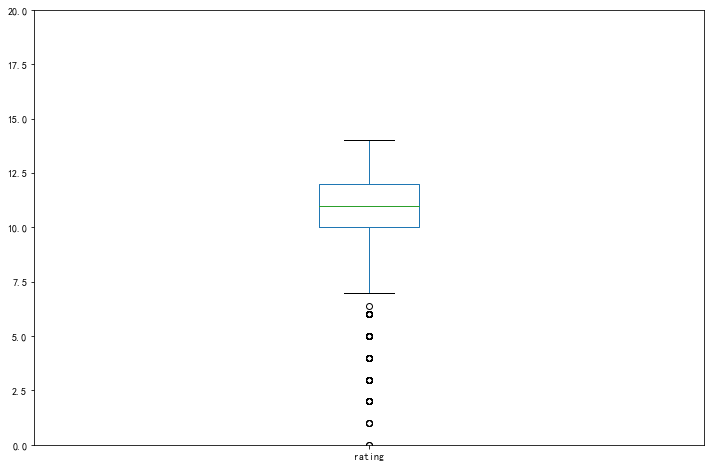

In [72]:
# 用箱型图查看rating分布和异常值
twt_archive_clean.rating.plot(kind='box',figsize=(12,8), ylim=[0,20]);

[0,20]这一“评分”区间较为合理，用直方图进一步看这一区间内具体各数值的分布。

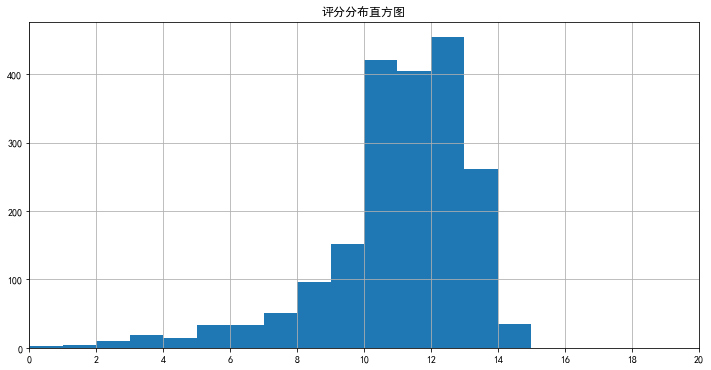

In [73]:
# 用直方图查看rating在20以内的分布
fig1, ax1 = plt.subplots()
twt_archive_clean.rating[twt_archive_clean.rating<20].hist(figsize=(12,6), bins=range(0,21,1));
ax1.set_xlim(0,20);
ax1.set_xticks(range(0,21,2))
ax1.set_title('评分分布直方图')
plt.savefig('评分分布直方图.png')
plt.show()

__结论：__  
对狗狗的评分主要集中在10-14分的区间，由此可见，WeRateDogs对狗狗的评价一般都是正面的，且超过10分（满分）的情况十分普遍。  

##### (2) 转发数

In [74]:
# 用value_counts查看retweet_count信息
twt_archive_clean.retweet_count.describe()

count     1994.000000
mean      2770.021063
std       4715.961325
min         15.000000
25%        622.250000
50%       1348.500000
75%       3202.750000
max      79116.000000
Name: retweet_count, dtype: float64

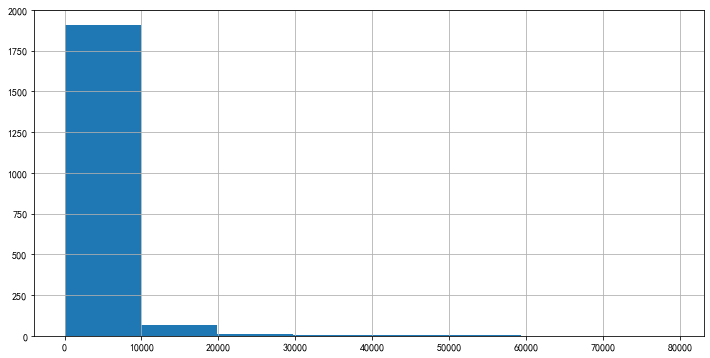

In [75]:
# 用直方图直观查看retweet_count分布
twt_archive_clean.retweet_count.hist(figsize=(12,6), bins=8);

由此可见，“转发数”也呈明显的长尾分布。用箱型图查看10000以内的数据集中情况。

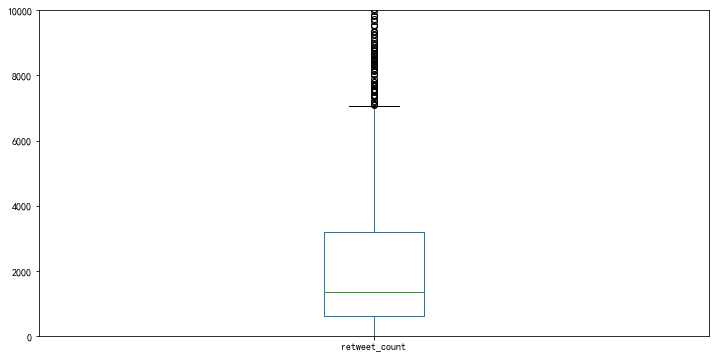

In [76]:
twt_archive_clean.retweet_count.plot(kind='box', figsize=(12,6), ylim=[0,10000]);

“转发数”的集中区间在10000以内，分析这个区间的数据分布比较有代表性。

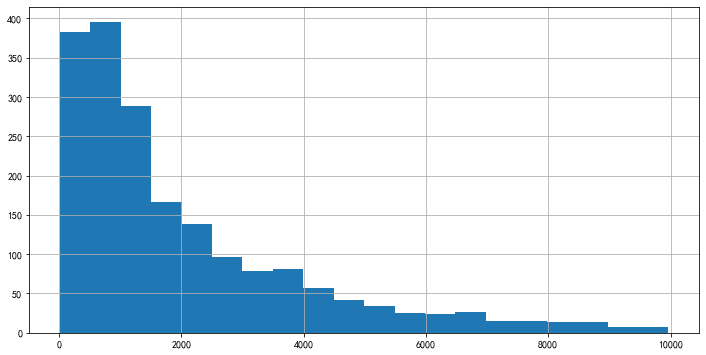

In [97]:
# 用直方图分析10000以内的转发数分布
twt_archive_clean.retweet_count[twt_archive_clean.retweet_count<10000].hist(figsize=(12,6), bins=20);

__结论：__   
“转发数”分布呈明显的长尾分布，“转发数”数量主要集中在1500以内。

##### (3) 喜爱数

In [78]:
# 用value_counts查看favorite_count信息
twt_archive_clean.favorite_count.describe()

count      1994.000000
mean       8923.133400
std       12400.238808
min          81.000000
25%        1972.250000
50%        4117.000000
75%       11275.500000
max      132318.000000
Name: favorite_count, dtype: float64

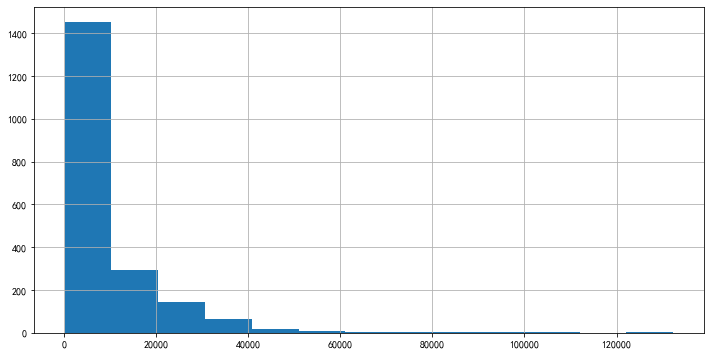

In [79]:
# 用直方图直观查看favorite_count分布
twt_archive_clean.favorite_count.hist(figsize=(12,6), bins=13);

由此可见，“喜爱数”也呈明显的长尾分布。用箱型图查看40000以内的数据集中情况。

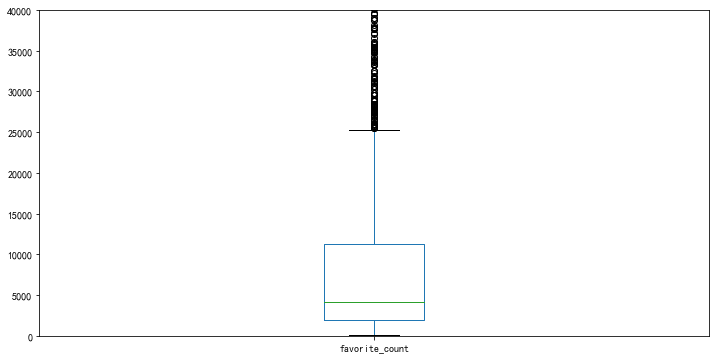

In [80]:
twt_archive_clean.favorite_count.plot(kind='box', figsize=(12,6), ylim=[0,40000]);

“喜爱数”的集中区间在40000以内，分析这个区间的数据分布比较有代表性。

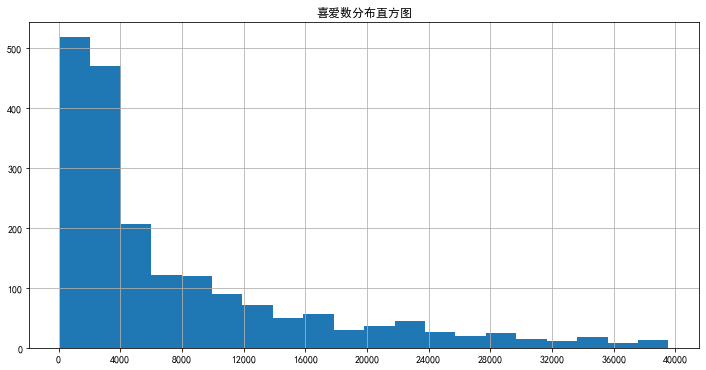

In [81]:
# 用直方图分析10000以内的喜爱数分布
fig2, ax2 = plt.subplots()
twt_archive_clean.favorite_count[twt_archive_clean.favorite_count<40000].hist(figsize=(12,6), bins=20);
ax2.set_xticks(range(0,40001,4000));
ax2.set_title('喜爱数分布直方图')
plt.savefig('喜爱数分布直方图.png')
plt.show()

__结论：__   
“喜爱数”分布呈明显的长尾分布，“喜爱数”数量主要集中在4000以内。

#### 2.转发数、喜爱数与评分的关系  
（1）转发数与评分的关系

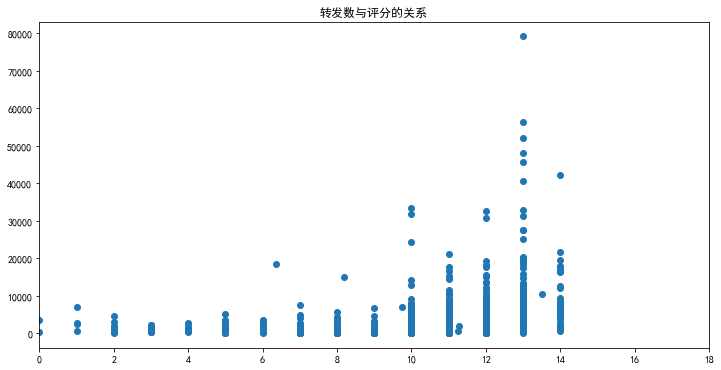

In [82]:
fig3, ax3 = plt.subplots(figsize=(12,6))
ax3.scatter(twt_archive_clean.rating, twt_archive_clean.retweet_count);
ax3.set_xlim(0,18);
# ax3.set_ylim(0,10000);
ax3.set_xticks(range(0,19,2));
ax3.set_title('转发数与评分的关系');
plt.savefig('转发数与评分的关系.png')
plt.show()

由于数据量大，散点图的点比较密集。因此再用箱型图来看各“评分”对应的“转发数”的集中区间

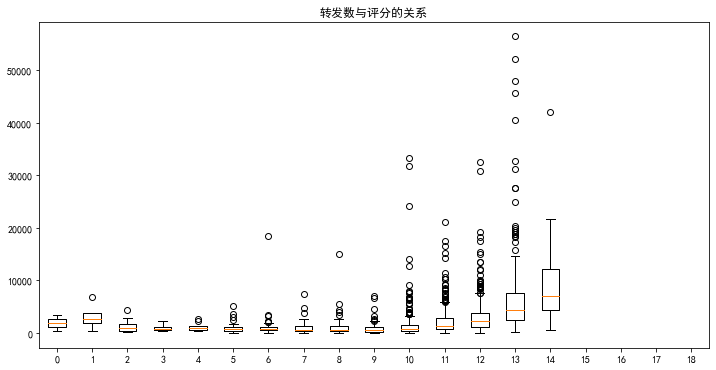

In [83]:
# 由于“转发数”最高值太高，导致箱型图报错，设置箱型图“喜爱数”的上限为60000

retweet_count_box = []
for i in range(0,19):
    retweet_count_box.append(list(twt_archive_clean.loc[(twt_archive_clean.rating>=i)&(twt_archive_clean.rating<(i+1)) & 
                                                        (twt_archive_clean.retweet_count<=60000), 'retweet_count']))
fig4, ax4 = plt.subplots(figsize=(12,6))
plt.boxplot(retweet_count_box, labels=range(0,19));
ax4.set_title('转发数与评分的关系');
plt.show()

__结论：__   
即使排除异常值，__“转发数”与“评分”没有明显的相关关系__。  
但是,在评分为[0,14]区间内，“转发数”的__上限__与“评分”有一定程度的正相关关系。一般来说，“转发数”数量最高的推特的评分在[10，14]之间。

（2）喜爱数与评分的关系

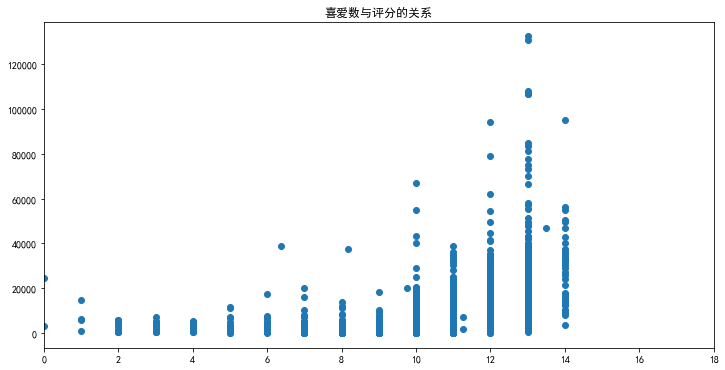

In [84]:
fig5, ax5 = plt.subplots(figsize=(12,6))
ax5.scatter(twt_archive_clean.rating, twt_archive_clean.favorite_count);
ax5.set_xlim(0,18);
ax5.set_xticks(range(0,19,2));
ax5.set_title('喜爱数与评分的关系');
plt.savefig('喜爱数与评分的关系.png')
plt.show()

由于数据量大，散点图的点比较密集。因此再用箱型图来看各“评分”对应的“喜爱数”的集中区间。

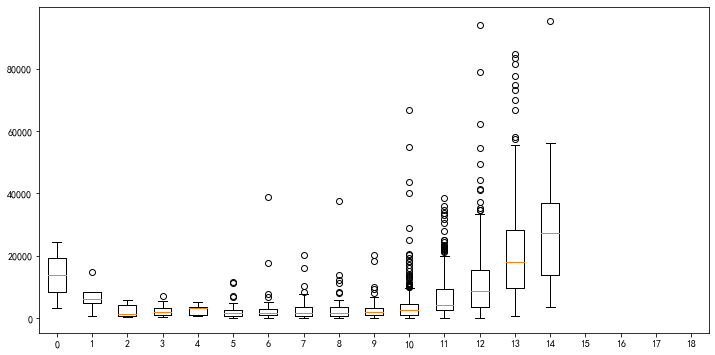

In [85]:
# 由于“喜爱数”最高值太高，导致箱型图报错，设置箱型图“喜爱数”的上限为100000
favorite_count_box = []
for i in range(0,19):
    favorite_count_box.append(list(twt_archive_clean.loc[(twt_archive_clean.rating>=i)&(twt_archive_clean.rating<(i+1)) & 
                                                         (twt_archive_clean.favorite_count<=100000), 'favorite_count']))
fig6, ax6 = plt.subplots(figsize=(12,6))
plt.boxplot(favorite_count_box, labels=range(0,19));
plt.show()

__结论：__  
由此可见，即使排除异常值，__“喜爱数”与“评分”没有明显的相关关系__。  
但是,在评分为[0,14]区间内，“喜爱数”的__上限__与评分有一定程度的正相关关系。一般来说，“喜爱数”数量最高的推特的评分在[10，14]之间。

#### 3. 评分与地位的关系 

In [86]:
twt_archive_clean.rating.groupby(twt_archive_clean.stage).describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,11.888889,1.471351,8.0,11.00,12.0,13.0,14.0
"doggo, floofer",1.0,11.000000,NaN,11.0,11.00,11.0,11.0,11.0
"doggo, pupper",9.0,11.000000,2.397916,5.0,11.00,12.0,12.0,13.0
"doggo, puppo",1.0,13.000000,NaN,13.0,13.00,13.0,13.0,13.0
floofer,7.0,12.000000,1.154701,10.0,11.50,12.0,13.0,13.0
pupper,203.0,10.636798,1.728179,3.0,10.00,11.0,12.0,14.0
puppo,22.0,12.000000,1.309307,9.0,11.25,12.0,13.0,14.0


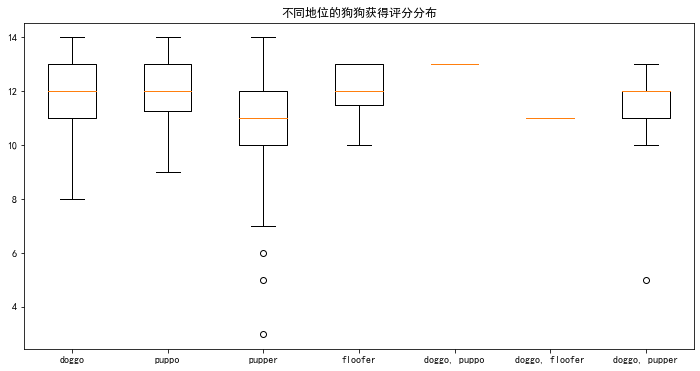

In [87]:
rating_stage_box = []
rating_count_stage_box_name = []
for stage in list(twt_archive_clean[~twt_archive_clean.stage.isna()].stage.unique()):
    rating_count_stage_box_name.append(stage)
    rating_stage_box.append(twt_archive_clean.loc[twt_archive_clean.stage == stage, 'rating'])
fig7, ax7 = plt.subplots(figsize=(12,6))
plt.boxplot(rating_stage_box, labels=rating_count_stage_box_name)
ax7.set_title('不同地位的狗狗获得评分分布')
plt.savefig('不同地位的狗狗获得评分分布.png')
plt.show()

__结论：__  
从统计数据和箱型图来看，“地位”与“评分”之间没有明显关系，不同“地位”的狗狗的“评分”的平均数都十分接近。

#### 4. 转发数、喜爱数与地位的关系
（1）转发数与地位的关系

In [88]:
twt_archive_clean.retweet_count.groupby(twt_archive_clean.stage).describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,7088.396825,12806.187498,718.0,2015.5,3300.0,5388.5,79116.0
"doggo, floofer",1.0,3419.000000,NaN,3419.0,3419.0,3419.0,3419.0,3419.0
"doggo, pupper",9.0,4061.555556,5093.534458,1260.0,2164.0,2515.0,3071.0,17522.0
"doggo, puppo",1.0,19118.000000,NaN,19118.0,19118.0,19118.0,19118.0,19118.0
floofer,7.0,4935.000000,6110.222336,494.0,1816.0,3250.0,4413.0,18343.0
pupper,203.0,2352.285714,3558.409135,102.0,686.0,1189.0,2447.0,32705.0
puppo,22.0,6434.818182,10236.875042,707.0,1704.5,3115.5,6245.0,47958.0


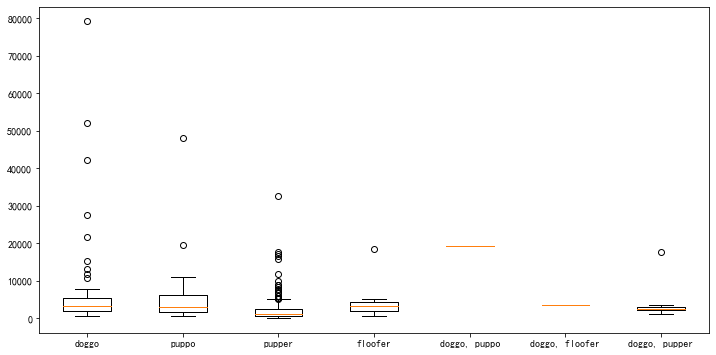

In [89]:
retweet_count_stage_box = []
retweet_count_stage_box_name = []
for stage in list(twt_archive_clean[~twt_archive_clean.stage.isna()].stage.unique()):
    retweet_count_stage_box_name.append(stage)
    retweet_count_stage_box.append(twt_archive_clean.loc[twt_archive_clean.stage == stage, 'retweet_count'])
fig8, ax8 = plt.subplots(figsize=(12,6))
plt.boxplot(retweet_count_stage_box, labels=retweet_count_stage_box_name)
plt.show()

将y轴“转发数”放大至[0,11000]区间内，以便更清晰地观察各“地位”狗狗地转发数情况。

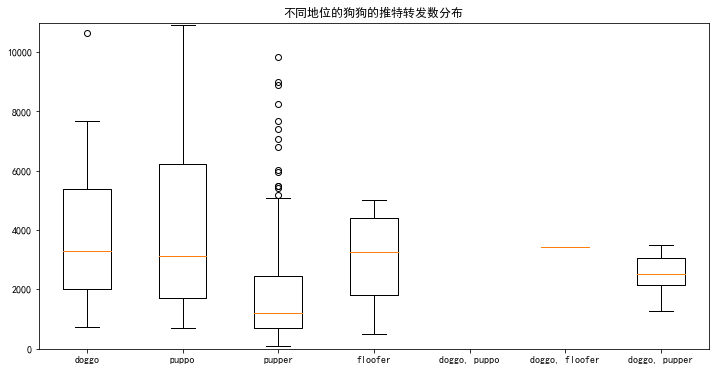

In [90]:
retweet_count_stage_box = []
retweet_count_stage_box_name = []
for stage in list(twt_archive_clean[~twt_archive_clean.stage.isna()].stage.unique()):
    retweet_count_stage_box_name.append(stage)
    retweet_count_stage_box.append(twt_archive_clean.loc[twt_archive_clean.stage == stage, 'retweet_count'])
fig9, ax9 = plt.subplots(figsize=(12,6))
ax9.boxplot(retweet_count_stage_box, labels=retweet_count_stage_box_name)
ax9.set_ylim(0,11000);
ax9.set_title('不同地位的狗狗的推特转发数分布')
plt.savefig('不同地位的狗狗的推特转发数分布.png')
plt.show()

__结论：__  
从统计数据和箱型图来看，pupper的推特的平均转发量明显低于其他狗狗，人们对pupper的兴趣可能相对其他狗狗较低。

（2）喜爱数与地位的关系

In [91]:
twt_archive_clean.favorite_count.groupby(twt_archive_clean.stage).describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,19284.174603,22125.538490,2581.0,8240.00,12323.0,20444.00,130533.0
"doggo, floofer",1.0,17120.000000,NaN,17120.0,17120.00,17120.0,17120.00,17120.0
"doggo, pupper",9.0,12484.666667,12172.418669,4837.0,7011.00,8972.0,10295.00,44456.0
"doggo, puppo",1.0,47679.000000,NaN,47679.0,47679.00,47679.0,47679.00,47679.0
floofer,7.0,13156.857143,11218.669996,2255.0,5020.50,11252.0,17670.50,33209.0
pupper,203.0,7176.157635,10687.768107,687.0,2413.00,3217.0,7641.00,106481.0
puppo,22.0,21505.681818,27933.475257,3265.0,7015.75,13349.5,19628.75,132318.0


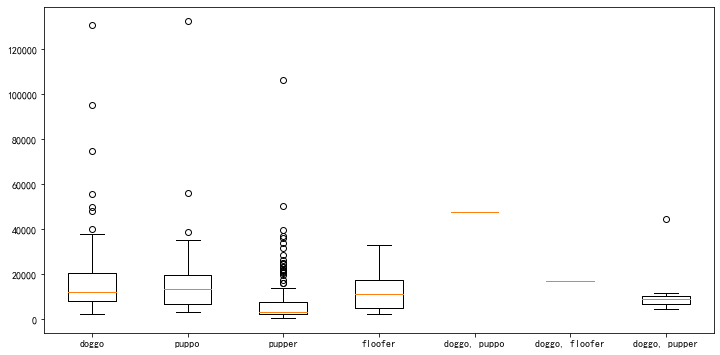

In [92]:
favorite_count_stage_box = []
favorite_count_stage_box_name = []
for stage in list(twt_archive_clean[~twt_archive_clean.stage.isna()].stage.unique()):
    favorite_count_stage_box_name.append(stage)
    favorite_count_stage_box.append(twt_archive_clean.loc[twt_archive_clean.stage == stage, 'favorite_count'])
fig10, ax10 = plt.subplots(figsize=(12,6))
plt.boxplot(favorite_count_stage_box, labels=favorite_count_stage_box_name)
plt.show()

将y轴“喜爱数”放大至[0,40000]区间内，以便更清晰地观察各“地位”狗狗地喜爱数情况。

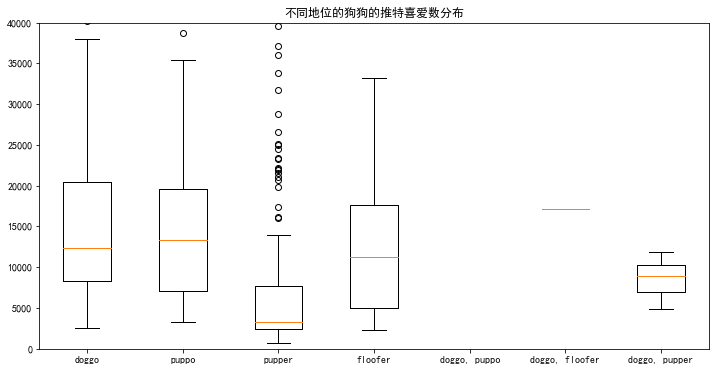

In [93]:
favorite_count_stage_box = []
favorite_count_stage_box_name = []
for stage in list(twt_archive_clean[~twt_archive_clean.stage.isna()].stage.unique()):
    favorite_count_stage_box_name.append(stage)
    favorite_count_stage_box.append(twt_archive_clean.loc[twt_archive_clean.stage == stage, 'favorite_count'])
fig11, ax11 = plt.subplots(figsize=(12,6))
ax11.boxplot(favorite_count_stage_box, labels=favorite_count_stage_box_name)
ax11.set_ylim(0,40000);
ax11.set_title('不同地位的狗狗的推特喜爱数分布')
plt.savefig('不同地位的狗狗的推特喜爱数分布.png')
plt.show()

__结论:__  
从统计数据和箱型图来看，pupper的推特的平均喜爱量明显低于其他狗狗，人们对pupper的喜爱可能相对其他狗狗较低。

#### 5. 转发数与喜爱数的关系

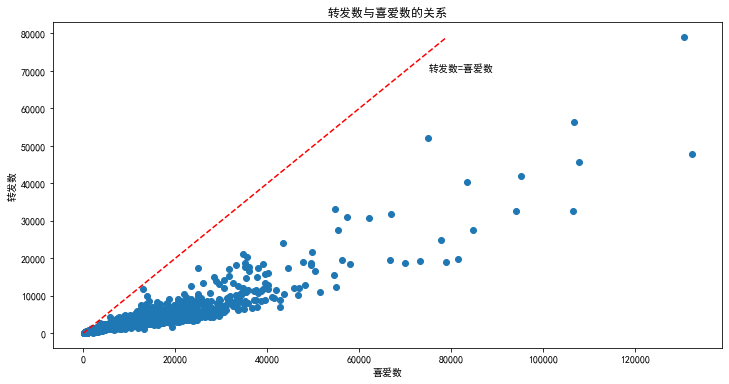

In [102]:
fig12, ax12 = plt.subplots(figsize=(12,6))
plt.scatter(twt_archive_clean.favorite_count, twt_archive_clean.retweet_count);
ax12.set_xlabel('喜爱数')
ax12.set_ylabel('转发数')
plt.plot(np.arange(0,80000,1000), np.arange(0,80000,1000), 'r--')
ax12.text(75000, 70000, '转发数=喜爱数')
ax12.set_title('转发数与喜爱数的关系')
plt.savefig('转发数与喜爱数的关系.png')
plt.show()

__结论:__
由散点图可以发现，“转发数”与“喜爱数”呈线性正相关关系。  

### 报告结论:
1. WeRateDogs对狗狗的评价都是倾向正面评价，超过10分（满分）的现象十分普遍；
2. WeRateDogs推特的“转发数”和“喜爱数”都呈明显的长尾分布，“转发数”主要集中在1500以内，“喜爱数”集中在4000以内；
3. “转发数”、“喜爱数”都与“评分”没有明显的相关关系，但“转发数”、“喜爱数”的上限与“评分”有正相关关系；“转发数”与“喜爱数”数量最高的推特的评分都在[10，14]之间；
4. 狗狗的“地位”与“评分”之间没有显著相关关系；
5. 推特的“转发数”与“喜爱数”呈正相关关系；同时，我们发现部分推特可能存在刷转发量的现象。